# Descriptive statistics - Unit 04: Categorical Data, Outliers and Summary Statistics

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Learn and interpret statistics for categorical data.
* Understand and identify ouliers
* Interpret a summary statistics


## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Categorical Data, Outliers and Summary Statistics

In this unit we will cover
* Descriptive statistics on categorical data
* Outliers
* Summary Statistics

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Categorical Data

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> A descriptive statistics with categorical data (or object data type in Python) is interested to count the frequencies from its levels

Let's consider the following dataset. It has records for 3 different species of penguins, collected from 3 islands in the Palmer Archipelago, Antarctica

df = sns.load_dataset('penguins')
print(df.shape)
df.head()

We can use `.describe(include='all')` to calculate the descriptives statistics for categorical variable.
* In the examples below we filtered the categorical variables with `.select_dtypes(include='object')`, to focus on categorical data only. But as you have seen in Pandas, it is not issue to mix numerical and categorical data when using `.describe(include='all')`

It shows the total non-null number of rows for a given, column, how many unique levels it has, the most frequent level and its frequency.

df.select_dtypes(include='object').describe(include='all')

In addition, you can count the values for each categorical variable using `.value_counts()`, while looping in all categorical variables

for col in df.select_dtypes(include='object').columns:
  print(f"{df[col].value_counts()}  \n\n")

Finally, we can plot the categorical data in bar plots to visualize the univariate distribution
* You may use the library you feel more comfortable. In this case, we used Seaborn

for col in df.select_dtypes(include='object'):
  plt.figure(figsize=(10,4))
  sns.countplot(data=df, x=col)
  plt.title(f"{col} Distribution")
  plt.show()
  print("\n")

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Outliers

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Outliers are simply datapoints that are different from the majority of the data

* Consider the dataset below. It holds records for waiter tips, based on day of the week, day time, total bill, gender, if it is a smoker table or not, and how many people were in the table.

df = sns.load_dataset('tips')
print(df.shape)
df.head()

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> A rule of thumb used to define a given datapoint is an outlier is to determine if that datapoint is:
* **1** - above Q3 +  1.5 x IQR or 
* **2** - below Q1 - 1.5 x IQR

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> In the histograms below, you can check the data is an outlier by checking everything that is **not** in between the **range from "Q1 - 1.5 IQR"** to **"Q3 - 1.5 IQR"**
* We also place the median levels
* You will notice that the outliers in this data set, are located more to the right side of the distribution. However this is just a circunstance, outliers can be in any side of the distribution

for col in  df.select_dtypes(include='number').columns:

  fig, axes = plt.subplots(figsize=(12,6))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)

  plt.axvline(df[col].median(), color='g', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.95, s='Median', fontsize=10, c='g')


  IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)

  plt.axvline(df[col].quantile(q=0.25), color='r', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.25) + df[col].std()/10, y=axes.get_ylim()[1] * 0.90, s="Q1", fontsize=10, c='r')

  plt.axvline(df[col].quantile(q=0.25) - 1.5*IQR, color='k', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.25) - 1.5*IQR + df[col].std()/10, y=axes.get_ylim()[1] * 0.75, s="Q1 - 1.5IQR", fontsize=10, c='k')
  
  plt.axvline(df[col].quantile(q=0.75), color='r', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.75) + df[col].std()/10, y=axes.get_ylim()[1] * 0.90, s="Q3", fontsize=10, c='r')

  plt.axvline(df[col].quantile(q=0.75) + 1.5*IQR, color='k', linestyle='dashed', linewidth=1.5)
  plt.text(x=df[col].quantile(q=0.75) + 1.5*IQR + df[col].std()/10, y=axes.get_ylim()[1] * 0.65, s="Q3 + 1.5IQR", fontsize=10, c='k')
  
  plt.show()
  print("\n")

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Just a quick recap ona boxplot and its major elements: min, max, median, IQR, and outliers
* Note: you will notice that in the example below, there is noQ1 - 1.5 IQR, since there is not below this interval. There is only the min value
* On the other side, we find Q3 + 1.5 IQR, the outliers and the max value (which happens to be an outlier)

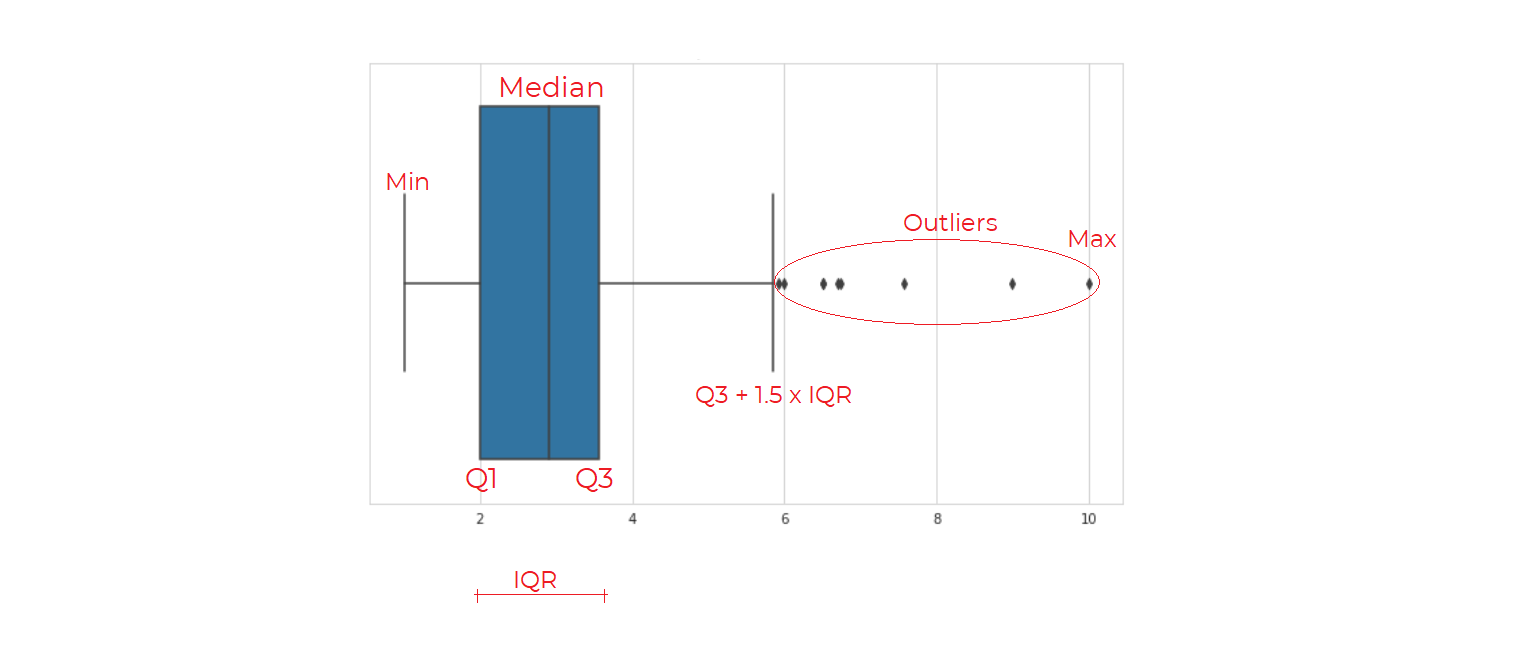

You can check in a box plot and note the ouliers marked as points

for col in  df.select_dtypes(include='number').columns:
  fig, axes = plt.subplots(figsize=(10,3))
  sns.boxplot(data=df, x=col)

  plt.title(f"{col} Boxplot")
  plt.show()
  print("\n")

Finally, you can combine both boxplot and histograms in a unique way for univariate analysis. It gives you more perspesctive in one single Figure: you can check the distribution shape and main figures
* We considered the additional `gridspec_kw` argument at `plt.subplots()`, so we could control the proportional size of the Axes in the Figure. In this case, we want the the first Axes - box plot - to occupy 15% of the Figure, and the second Axes - histogram - to occupy 85% of the Figure

for col in  df.select_dtypes(include='number').columns:
  fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
  sns.boxplot(data=df, x=col, ax=axes[0])
  sns.histplot(data=df, x=col, kde=True, ax=axes[1])
  fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
  plt.show()
  print("\n")

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Summary / Calculate Descriptive Statistics

We combine `.describe()`, .`skew()` and `.kurtosis()` to analyze our numerical and categorical data

* Consider the dataset below. It holds records for waiter tips, based on day of the week, day time, total bill, gender, if it is a smoker table or not, and how many people were in the table.

df = sns.load_dataset('tips')
print(df.shape)
df.head()

You will notice that, naturally, for categorical variables we don't have skewness and kurtosis

ser_skew = df.skew() # the result is a Pandas Series, we will append to a DataFrame
ser_skew.name = 'Skewness'

ser_kurt = df.skew() # the result is a Pandas Series, we will append to a DataFrame
ser_kurt.name = 'Kurtosis'

SummaryStats = df.describe(include='all')
SummaryStats = SummaryStats.append(ser_skew).append(ser_kurt)
SummaryStats

---